In [1]:
### Imports #####
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from graphviz import Digraph

2025-07-04 08:51:54.923620: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-04 08:51:54.924224: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-04 08:51:54.926358: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-04 08:51:54.931595: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751644314.941137  371801 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751644314.94

In [2]:
!uv pip list

Using Python 3.11.9 environment at: .env
Package                      Version
---------------------------- --------------
absl-py                      2.3.1
anyio                        4.9.0
argon2-cffi                  25.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    3.0.0
astunparse                   1.6.3
async-lru                    2.0.5
attrs                        25.3.0
babel                        2.17.0
beautifulsoup4               4.13.4
bleach                       6.2.0
certifi                      2025.6.15
cffi                         1.17.1
charset-normalizer           3.4.2
comm                         0.2.2
contourpy                    1.3.2
cycler                       0.12.1
debugpy                      1.8.14
decorator                    5.2.1
defusedxml                   0.7.1
executing                    2.2.0
fastjsonschema               2.21.1
filelock                     3.18.0
flatbuffers             

In [3]:
# 1. Load dataset from the raw GitHub CSV link
data_set = "Split_Data/Uncleaned/CEAS_08_train.csv"
df = pd.read_csv(data_set)

In [4]:
# Display first rows and label balance for initial inspection
print(df.head())
print("\n_______________________________________\n")
print(df['label'].value_counts())

                                              sender  \
0      Rick Riley <ClydepooleFox@prettyactivity.com>   
1    Clifford Hamilton <Clifford@studentjourney.org>   
2  Hunter Holliday <sowinghv7@allwestfurnishing.com>   
3                    Perl Jobs <xycn-vtnhz@perl.org>   
4                      Asif Iqbal <qckkk5@gmail.com>   

                             receiver                             date  \
0      user2.11@gvc.ceas-challenge.cc  Fri, 08 Aug 2008 11:54:58 -0200   
1    user7-ext1@gvc.ceas-challenge.cc  Thu, 07 Aug 2008 18:32:09 +0700   
2  user8.2-ext1@gvc.ceas-challenge.cc  Wed, 06 Aug 2008 16:23:32 +0100   
3                       necc@perl.org  Wed, 06 Aug 2008 21:55:07 -0800   
4       zqoqi@spamassassin.apache.org  Fri, 08 Aug 2008 00:18:34 -0500   

                                             subject  \
0  Which Ones Really Work? We List The Top Penis ...   
1                           Make women crave for it!   
2                           WelcomeCanadianTakeALo

In [5]:
# 2. Prepare the features (email text) and target (label)
X = df['sender']  # the email content column
y = df['label'].values

In [6]:
# 3. Convert text emails to TF-IDF vectors (numerical feature vectors)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  # limit vocabulary for speed
X_vect = vectorizer.fit_transform(X).toarray()  # fit to all data, transform to matrix

In [7]:
# 4. Split dataset into training and testing sets (stratified to preserve label ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X_vect, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
# 5. Build a Multi-Layer Perceptron (MLP) model
# Initialize a sequential model
model = Sequential([
    Input(shape=(X_train.shape[1],)),      # 1. Input layer: specifies the shape of each input sample
    Dense(256, activation='relu'),         # 2. First hidden layer: 256 neurons, ReLU activation
    Dropout(0.4),                          # 3. Dropout: randomly sets 40% of inputs to zero during training (regularization)
    Dense(64, activation='relu'),          # 4. Second hidden layer: 64 neurons, ReLU activation
    Dropout(0.3),                          # 5. Dropout: 30% dropout rate for further regularization
    Dense(1, activation='sigmoid')         # 6. Output layer: 1 neuron, sigmoid activation for binary classification
])

E0000 00:00:1751644322.371803  371801 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1751644322.375869  371801 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
# Compile the model with optimizer, loss function, and metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()  # show model architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │     1,280,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,296,769 (4.95 MB)

 Trainable params: 1,296,769 (4.95 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 6. Train the model on the training data, validating on 20% of training data each epoch
history = model.fit(X_train, y_train, epochs=8, batch_size=64, validation_split=0.2)


Epoch 1/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7397 - loss: 0.4998 - val_accuracy: 0.9419 - val_loss: 0.1595
Epoch 2/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9576 - loss: 0.1180 - val_accuracy: 0.9476 - val_loss: 0.1452
Epoch 3/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9667 - loss: 0.0860 - val_accuracy: 0.9464 - val_loss: 0.1482
Epoch 4/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9742 - loss: 0.0693 - val_accuracy: 0.9464 - val_loss: 0.1552
Epoch 5/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9788 - loss: 0.0606 - val_accuracy: 0.9469 - val_loss: 0.1691
Epoch 6/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9792 - loss: 0.0577 - val_accuracy: 0.9464 - val_loss: 0.1800
Epoch 7/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9790 - loss: 0.0575 - val_accuracy: 0.9469 - val_loss: 0.1781
Epoch 8/8
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9823 - loss: 0.0510 - val_accuracy: 0.9466 - v

In [11]:
# 7. Predict on the test set (outputs probability, so threshold > 0.5 means phishing)
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))  # print precision/recall/F1 for both classes
print("Accuracy:", accuracy_score(y_test, y_pred))  # overall accuracy

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2216
           1       0.94      0.95      0.95      2796

    accuracy                           0.94      5012
   macro avg       0.94      0.94      0.94      5012
weighted avg       0.94      0.94      0.94      5012

Accuracy: 0.9393455706304868


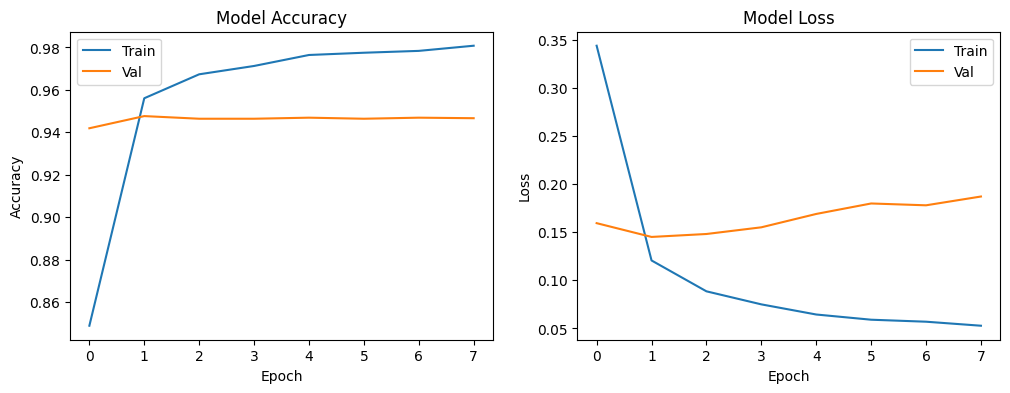

In [12]:
# 8. Plot accuracy and loss curves for training and validation to visualize learning progress
plt.figure(figsize=(12,4))

# Plot accuracy curve
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss curve
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

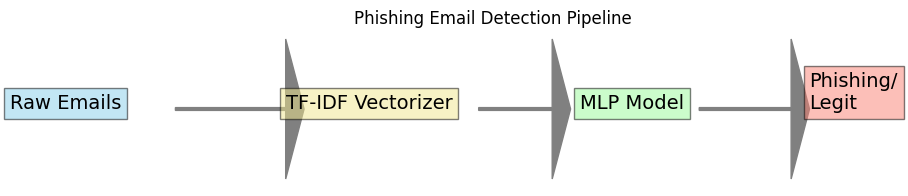

In [22]:
# Create a figure and axis object with a wide aspect ratio for the pipeline
fig, ax = plt.subplots(figsize=(9,2))  


ax.axis('off')  # Hide the axis lines and ticks for a cleaner visual (no coordinate grid)

# Place a text box labeled "Raw Emails" at (0.05, 0.5) with a blue background; larger font for visibility
ax.text(0.05, 0.5, "Raw Emails", bbox=dict(facecolor='skyblue', alpha=0.5), fontsize=14)

# Draw an arrow from "Raw Emails" to the next box (rightwards), with gray color and arrowhead
ax.arrow(0.23, 0.5, 0.12, 0, head_width=0.05, head_length=0.02, fc='gray', ec='gray')

# Add a box labeled "TF-IDF Vectorizer" in the middle of the pipeline, with a yellow (khaki) background
ax.text(0.35, 0.5, "TF-IDF Vectorizer", bbox=dict(facecolor='khaki', alpha=0.5), fontsize=14)

# Draw an arrow from "TF-IDF Vectorizer" to "MLP Model"
ax.arrow(0.56, 0.5, 0.08, 0, head_width=0.05, head_length=0.02, fc='gray', ec='gray')

# Add a box labeled "MLP Model" further right, with a light green background
ax.text(0.67, 0.5, "MLP Model", bbox=dict(facecolor='palegreen', alpha=0.5), fontsize=14)

# Draw an arrow from "MLP Model" to the final prediction box
ax.arrow(0.80, 0.5, 0.10, 0, head_width=0.05, head_length=0.02, fc='gray', ec='gray')

# Place the final box "Phishing/Legit" at the end, with a pink background; "\n" splits the label into two lines
ax.text(0.92, 0.5, "Phishing/\nLegit", bbox=dict(facecolor='salmon', alpha=0.5), fontsize=14)

# Add a title to the diagram for context
plt.title("Phishing Email Detection Pipeline")


plt.show()



In [18]:

# Create a new directed graph object called 'dot', with a descriptive comment and output format as PNG
dot = Digraph(comment='Phishing Email Detection MLP Pipeline', format='png')

# Set the direction of the graph layout to Left-to-Right (LR), so nodes are arranged in a horizontal pipeline
dot.attr(rankdir='LR')

# Add the first node (A) labeled "Raw Emails (Text)"—the starting point of your pipeline
dot.node('A', 'Raw Emails (Text)')

# Add the second node (B) labeled "Preprocessing & TF-IDF Vectorizer"—represents feature extraction
dot.node('B', 'Preprocessing & TF-IDF Vectorizer')

# Add the third node (C) labeled "MLP Model", with a line break to describe its layers
dot.node('C', 'MLP Model\n(Dense→Dropout→Dense→Dropout→Output)')

# Add the fourth node (D) labeled "Prediction", with a line break for "Phishing/Legit" outcome
dot.node('D', 'Prediction\n(Phishing/Legit)')

# Create directed edges (arrows) from A to B, B to C, and C to D, showing flow of data through the pipeline
dot.edges(['AB', 'BC', 'CD'])

# Render the graph to a PNG file named 'mlp_pipeline.png' and open it in the default image viewer
dot.render('mlp_pipeline', view=True)




'mlp_pipeline.png'